# Plot Embeddors
For generating plots for the paper/poster.

In [2]:
import pickle
from embedding import NaiveEmbeddor, ReconstructEmbeddor, CheapEmbeddor
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

In [3]:
gen = 3
with open(f"embeddor_runs/gen{gen}/naive.pkl", "rb") as fin:
    naive = pickle.load(fin)
with open(f"embeddor_runs/gen{gen}/reconstruct.pkl", "rb") as fin:
    reconstruct = pickle.load(fin)
with open(f"embeddor_runs/gen{gen}/cheap.pkl", "rb") as fin:
    cheap = pickle.load(fin)

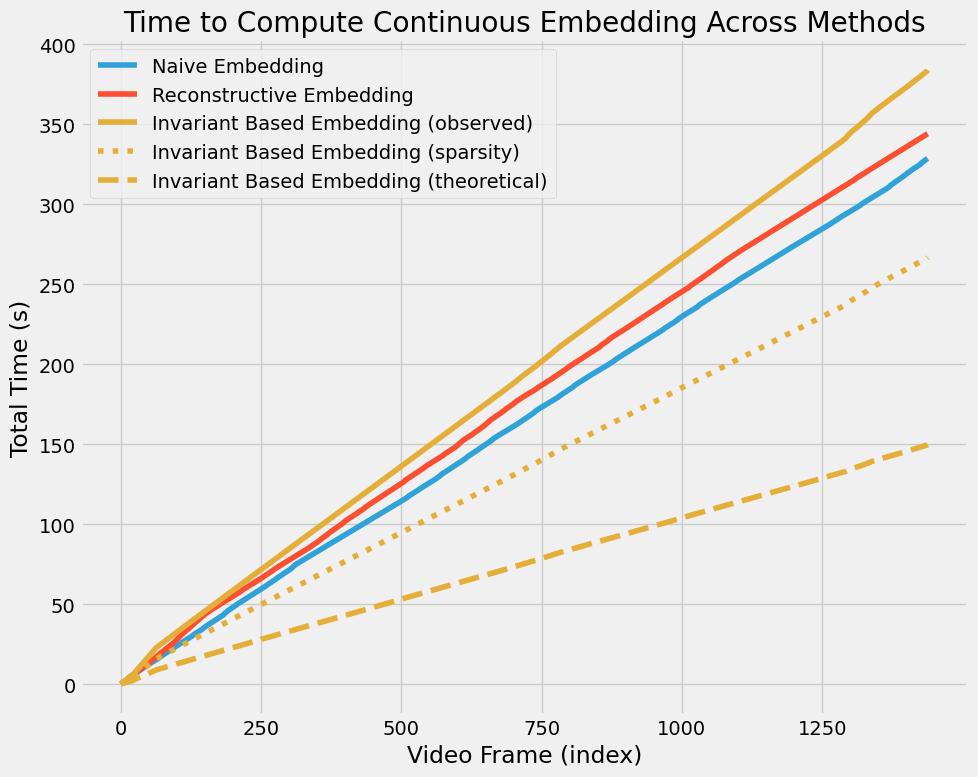

In [9]:
def time_plot(naive, reconstruct, cheap):
    """
    Code to generate my results plot concerning embedding time
    """
    style.use("fivethirtyeight")

    fig, ax = plt.subplots(figsize=(10, 8))

    sparsity_times = [no_diff + (frame - no_diff) * 0.5 for (frame, no_diff) in zip(cheap.frame_times, cheap.no_diff_times)]

    ax.plot(naive.frame_times, label="Naive Embedding", linestyle="-", color="#30a2da")
    ax.plot(reconstruct.frame_times, label="Reconstructive Embedding", linestyle="-", color="#fc4f30")
    ax.plot(cheap.frame_times, label="Invariant Based Embedding (observed)", linestyle="-", color="#e5ae38")
    ax.plot(sparsity_times, label="Invariant Based Embedding (sparsity)", linestyle=":", color="#e5ae38")
    ax.plot(cheap.no_diff_times, label="Invariant Based Embedding (theoretical)", linestyle="--", color="#e5ae38")

    ax.set_xlabel("Video Frame (index)")
    ax.set_ylabel("Total Time (s)")
    ax.set_title("Time to Compute Continuous Embedding Across Methods")

    x_ticks = np.arange(0, len(naive.frame_times), 250)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([str(i) for i in x_ticks])

    ax.legend()

    plt.tight_layout()
    plt.show()

time_plot(naive, reconstruct, cheap)

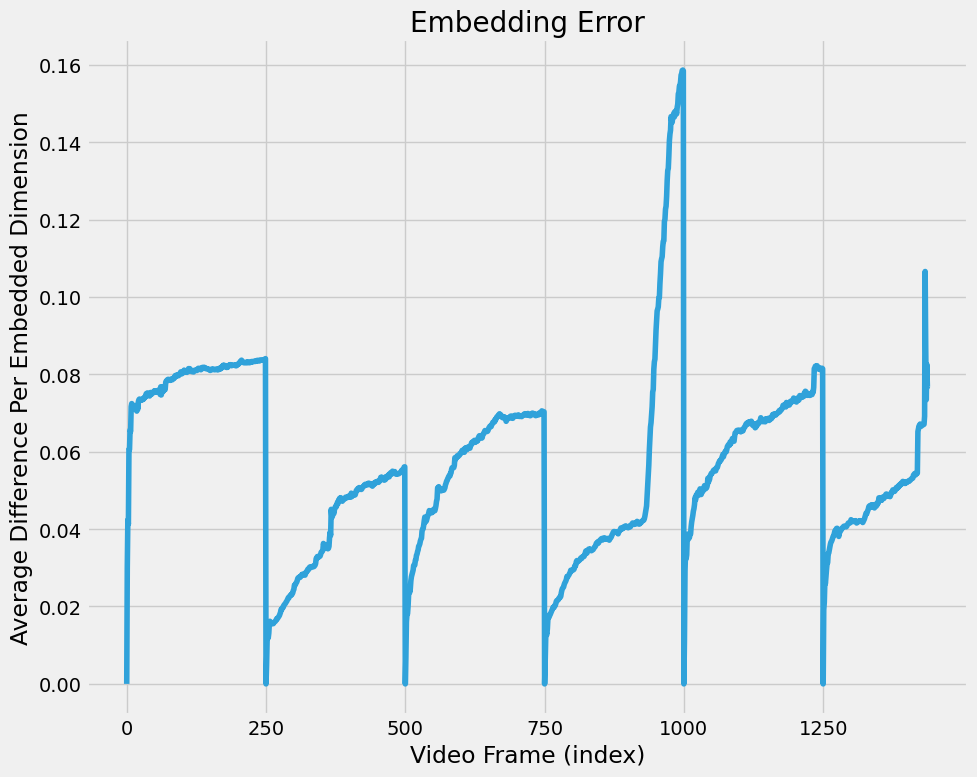

In [6]:
def get_errors(naive, cheap):
    """
    Calculates the frame wiseer
    """
    errors = []
    for nrow, crow in zip(naive.beds, cheap.beds):
        diff = np.sum(np.abs(nrow - crow)) / len(nrow)
        errors.append(diff)
    return errors

def errors_plot(errors):
    """
    Code to generate my results plot concerning embedding time
    """
    style.use("fivethirtyeight")

    fig, ax = plt.subplots(figsize=(10, 8))

    ax.plot(errors, linestyle="-", color="#30a2da")

    ax.set_xlabel("Video Frame (index)")
    ax.set_ylabel("Average Difference Per Embedded Dimension")
    ax.set_title("Embedding Error")

    x_ticks = np.arange(0, len(naive.frame_times), 250)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([str(i) for i in x_ticks])

    plt.tight_layout()
    plt.show()

errors = get_errors(naive, cheap)
errors_plot(errors)